MOVIE BARCODE REPORT :20181204 김지안

1# 모듈 및 함수 만들기

1-1. 우선 무비 바코드를 만들기 위해서는 몇 가지 모듈이 필요하다.

In [5]:
#import: 불러오다
import numpy as np
import importlib
import matplotlib.pyplot as plt
import cv2
import imageio

1-2. 색을 지정하는 함수를 만든다.

In [6]:
# def 함수명(변수):
     # 함수내용
     # return 반환할 값

def getRepColor(img): # getRepColor 함수 생성
    # rc와 cc는 각각 너비, 길이의 중간값
    # img.shape: (height, width, depth), 각각을 인덱싱하면 (0,1,2)
    # // 사용해야 정수값 도출
    rc = img.shape[0]//2 # shape[0]은 height
    cc = img.shape[1]//2 # shape[1]은 width
    #img.shape : (height, width, depth) 인덱싱 하면 (0,1,2)
    color = img[rc, cc] # 이미지 안에서 (rc, cc)에 해당하는 좌표의 color
    return color # 함수를 쓰면 img[rc,cc]

2# 동영상 불러오기

2-1. 바코드화하고자 하는 동영상을 filename이라는 변수에 저장한다.
그리고 filename을 cv2모듈을 이용해 프레임단위로 읽는(캡쳐하는) 변수 cap을 설정한다.

In [7]:
filename = 'C:\\Users\\user\\Desktop\\Shawn Mendes - Nervous.mp4' # 동영상 위치
cap = cv2.VideoCapture(filename) # 파일을 프레임 단위로 읽기

2-2. 만약 cap이 정상적으로 작동되지 않을 경우, 'File open error'을 출력해주는 if문도 만든다.

In [8]:
if cap.isOpened() == False:
    print('File open error:', filename) # 오류 있을 시 출력

3# 값을 저장할 리스트 만들기, img 범위 설정하기

3-1. 빈 리스트 CList를 생성한다.
이후 프레임이 끝날 때까지 cap을 읽는 read()함수를 반복하는 while문을 작성한다.
while문을 거쳐 나온 frame은 getRepColor() 함수를 거쳐 변수 c에 저장된다.
c가 append()함수를 통해 빈 리스트 CList에 추가된다.

In [9]:
CList = []

while(True):
    ret, frame = cap.read() # frame은 cap.read()

    if ret == False: #더이상 프레임이 안 남았을 때 while문 종료
        break 

    c = getRepColor(frame) # frame -> img(변수), frame이 c로 반환
    CList.append(c) #CList에 c 추가

3-2. img의 범위는 세로는 1000, 가로는 Clist의 길이만큼 설정한다.

In [10]:
cap.release()
img = np.zeros((1000,len(CList),3)) # (세로, 가로, 색깔단위(RGB))

4# 바코드 시각화하기

4-1. Clist의 길이만큼 반복되는 for 문을 만든다.
모든 프레임의 r,g,b는 img의 리스트에 각 리스트로 저장된다.

In [11]:
for i in range(len(CList)):
    #r = CList[i][0]
    #g = CList[i][1]
    #b = CList[i][2]
    img[:,i] = CList[i] #:(column) = 전체 = img[0:1000,i] = [r,g,b]

4-2. opencv모듈은 색을 b,g,r순으로 읽기 때문에, r,g,b 순서로 변환하는 작업이 필요하다.
우선, r,g,b가 각각의 리스트로 저장되어 있던 img를 cv2.split() 함수를 이용해 분리한다.
이후 cv2.merge() 함수를 이용해 올바른 순서로 정리한다.
이 때 img2라는 변수를 사용해 새롭게 정의한다.

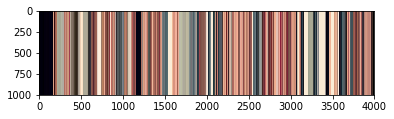

In [12]:
b,g,r = cv2.split(img) #img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) #b,r을 바꿔서 Merge

img2 = img2.astype(np.uint8) #데이터 타입을 uint8로
plt.imshow(img2)
plt.show()

5# 마무리

In [13]:
imageio.imwrite("MovieBarcode_Shawn Mendes_Nervous.jpg",img2)
#이 이름으로 이미지 파일을 만든다

cv2.destroyAllWindows() #cv2.imshow #생성된 모든 윈도우를 제거